In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 4

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1114 (4.35 KB)
Trainable params: 1114 (4.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/2 [==============>...............] - ETA: 1s - loss: 1.2946 - accuracy: 0.4531
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 2s 409ms/step - loss: 1.3100 - accuracy: 0.4507 - val_loss: 1.1616 - val_accuracy: 0.5211
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2504 - accuracy: 0.4219
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 125ms/step - loss: 1.2386 - accuracy: 0.4319 - val_loss: 1.1141 - val_accuracy: 0.5211


C:\Users\rituraj\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2348 - accuracy: 0.4141
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 79ms/step - loss: 1.1878 - accuracy: 0.4695 - val_loss: 1.0714 - val_accuracy: 0.5211
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2279 - accuracy: 0.4922
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 70ms/step - loss: 1.2061 - accuracy: 0.4789 - val_loss: 1.0341 - val_accuracy: 0.5493
Epoch 5/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1456 - accuracy: 0.5078
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 72ms/step - loss: 1.1355 - accuracy: 0.5023 - val_loss: 1.0001 - val_accuracy: 0.5634
Epoch 6/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1142 - accuracy: 0.5156
Epoch 6: sav

2/2 [==============================] - 0s 76ms/step - loss: 0.4998 - accuracy: 0.9061 - val_loss: 0.3905 - val_accuracy: 1.0000
Epoch 31/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4758 - accuracy: 0.8906
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 75ms/step - loss: 0.4952 - accuracy: 0.9014 - val_loss: 0.3742 - val_accuracy: 1.0000
Epoch 32/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4975 - accuracy: 0.9219
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 75ms/step - loss: 0.4930 - accuracy: 0.9249 - val_loss: 0.3585 - val_accuracy: 1.0000
Epoch 33/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5014 - accuracy: 0.9453
Epoch 33: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 74ms/step - loss: 0.4773 - accuracy: 0.9296 - val_loss: 0.

Epoch 58/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.2806 - accuracy: 0.9453
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 75ms/step - loss: 0.2429 - accuracy: 0.9624 - val_loss: 0.1160 - val_accuracy: 1.0000
Epoch 59/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.2213 - accuracy: 0.9688
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 71ms/step - loss: 0.2271 - accuracy: 0.9577 - val_loss: 0.1115 - val_accuracy: 1.0000
Epoch 60/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.2006 - accuracy: 0.9688
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 69ms/step - loss: 0.2177 - accuracy: 0.9718 - val_loss: 0.1072 - val_accuracy: 1.0000
Epoch 61/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.2339 - accuracy: 0.9453
Epoch

1/2 [==============>...............] - ETA: 0s - loss: 0.1442 - accuracy: 0.9844
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 76ms/step - loss: 0.1612 - accuracy: 0.9718 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 86/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1437 - accuracy: 0.9609
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 76ms/step - loss: 0.1525 - accuracy: 0.9624 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 87/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1619 - accuracy: 0.9375
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 72ms/step - loss: 0.1566 - accuracy: 0.9531 - val_loss: 0.0412 - val_accuracy: 1.0000
Epoch 88/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1648 - accuracy: 0.9453
Epoch 88: saving mo

1/2 [==============>...............] - ETA: 0s - loss: 0.1379 - accuracy: 0.9531
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 76ms/step - loss: 0.1356 - accuracy: 0.9531 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 113/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0929 - accuracy: 0.9922
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 71ms/step - loss: 0.0950 - accuracy: 0.9859 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 114/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0967 - accuracy: 0.9766
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 81ms/step - loss: 0.0983 - accuracy: 0.9765 - val_loss: 0.0180 - val_accuracy: 1.0000
Epoch 115/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1022 - accuracy: 0.9766
Epoch 115: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.0713 - accuracy: 0.9922
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 75ms/step - loss: 0.0962 - accuracy: 0.9765 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 140/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1242 - accuracy: 0.9688
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 71ms/step - loss: 0.1008 - accuracy: 0.9812 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 141/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1190 - accuracy: 0.9688
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 75ms/step - loss: 0.1105 - accuracy: 0.9718 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 142/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0694 - accuracy: 0.9844
Epoch 142: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.0840 - accuracy: 0.9609
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 71ms/step - loss: 0.0843 - accuracy: 0.9671 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 167/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0454 - accuracy: 1.0000
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 74ms/step - loss: 0.0444 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 168/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.1075 - accuracy: 0.9609
Epoch 168: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 80ms/step - loss: 0.0930 - accuracy: 0.9718 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 169/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0832 - accuracy: 0.9766
Epoch 169: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.0701 - accuracy: 0.9844
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 75ms/step - loss: 0.0618 - accuracy: 0.9859 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 194/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0571 - accuracy: 0.9922
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 84ms/step - loss: 0.0686 - accuracy: 0.9812 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 195/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0929 - accuracy: 0.9531
Epoch 195: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 77ms/step - loss: 0.0899 - accuracy: 0.9531 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 196/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0713 - accuracy: 0.9609
Epoch 196: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.0262 - accuracy: 1.0000
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 76ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 221/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0541 - accuracy: 0.9766
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 79ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 222/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0539 - accuracy: 0.9922
Epoch 222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 83ms/step - loss: 0.0461 - accuracy: 0.9953 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 223/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0630 - accuracy: 0.9922
Epoch 223: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.0828 - accuracy: 0.9766
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 73ms/step - loss: 0.0622 - accuracy: 0.9859 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 248/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0470 - accuracy: 0.9922
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 80ms/step - loss: 0.0407 - accuracy: 0.9953 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 249/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0696 - accuracy: 0.9844
Epoch 249: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 73ms/step - loss: 0.0765 - accuracy: 0.9765 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 250/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0598 - accuracy: 0.9922
Epoch 250: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.0285 - accuracy: 1.0000
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 76ms/step - loss: 0.0314 - accuracy: 0.9953 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 275/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0291 - accuracy: 0.9922
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 71ms/step - loss: 0.0697 - accuracy: 0.9812 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 276/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0530 - accuracy: 0.9922
Epoch 276: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 73ms/step - loss: 0.0470 - accuracy: 0.9906 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 277/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0489 - accuracy: 0.9766
Epoch 277: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.0354 - accuracy: 1.0000
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 81ms/step - loss: 0.0539 - accuracy: 0.9906 - val_loss: 8.9668e-04 - val_accuracy: 1.0000
Epoch 302/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0318 - accuracy: 1.0000
Epoch 302: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 87ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 8.7422e-04 - val_accuracy: 1.0000
Epoch 303/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0466 - accuracy: 0.9844
Epoch 303: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 82ms/step - loss: 0.0576 - accuracy: 0.9671 - val_loss: 8.6303e-04 - val_accuracy: 1.0000
Epoch 304/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0702 - accuracy: 0.9688
E

Epoch 328/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0589 - accuracy: 0.9766
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 73ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 6.2756e-04 - val_accuracy: 1.0000
Epoch 329/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0305 - accuracy: 0.9844
Epoch 329: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 70ms/step - loss: 0.0294 - accuracy: 0.9859 - val_loss: 6.2804e-04 - val_accuracy: 1.0000
Epoch 330/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0690 - accuracy: 0.9844
Epoch 330: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 77ms/step - loss: 0.0608 - accuracy: 0.9812 - val_loss: 6.2971e-04 - val_accuracy: 1.0000
Epoch 331/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0384 - acc

Epoch 355/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0294 - accuracy: 0.9922
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 73ms/step - loss: 0.0243 - accuracy: 0.9953 - val_loss: 4.3449e-04 - val_accuracy: 1.0000
Epoch 356/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0505 - accuracy: 0.9844
Epoch 356: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 74ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 4.2833e-04 - val_accuracy: 1.0000
Epoch 357/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0557 - accuracy: 0.9766
Epoch 357: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 85ms/step - loss: 0.0689 - accuracy: 0.9671 - val_loss: 4.1804e-04 - val_accuracy: 1.0000
Epoch 358/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0341 - acc

Epoch 382/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0341 - accuracy: 0.9844
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 87ms/step - loss: 0.0374 - accuracy: 0.9859 - val_loss: 3.5444e-04 - val_accuracy: 1.0000
Epoch 383/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0269 - accuracy: 0.9922
Epoch 383: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 74ms/step - loss: 0.0218 - accuracy: 0.9953 - val_loss: 3.5339e-04 - val_accuracy: 1.0000
Epoch 384/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0351 - accuracy: 0.9922
Epoch 384: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 77ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 3.5047e-04 - val_accuracy: 1.0000
Epoch 385/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0324 - acc

Epoch 409/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0204 - accuracy: 1.0000
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 135ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 2.4045e-04 - val_accuracy: 1.0000
Epoch 410/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0379 - accuracy: 0.9922
Epoch 410: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 114ms/step - loss: 0.0393 - accuracy: 0.9906 - val_loss: 2.3513e-04 - val_accuracy: 1.0000
Epoch 411/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0466 - accuracy: 0.9844
Epoch 411: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 112ms/step - loss: 0.0392 - accuracy: 0.9812 - val_loss: 2.2988e-04 - val_accuracy: 1.0000
Epoch 412/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0394 - 

Epoch 436/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0208 - accuracy: 1.0000
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 81ms/step - loss: 0.0267 - accuracy: 0.9953 - val_loss: 1.9802e-04 - val_accuracy: 1.0000
Epoch 437/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0123 - accuracy: 1.0000
Epoch 437: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 71ms/step - loss: 0.0311 - accuracy: 0.9859 - val_loss: 1.9719e-04 - val_accuracy: 1.0000
Epoch 438/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0131 - accuracy: 1.0000
Epoch 438: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 82ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 1.9570e-04 - val_accuracy: 1.0000
Epoch 439/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0290 - acc

Epoch 463/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0146 - accuracy: 1.0000
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 71ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 1.7880e-04 - val_accuracy: 1.0000
Epoch 464/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0422 - accuracy: 0.9844
Epoch 464: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 72ms/step - loss: 0.0303 - accuracy: 0.9906 - val_loss: 1.7576e-04 - val_accuracy: 1.0000
Epoch 465/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0262 - accuracy: 0.9844
Epoch 465: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 72ms/step - loss: 0.0265 - accuracy: 0.9859 - val_loss: 1.7031e-04 - val_accuracy: 1.0000
Epoch 466/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0168 - acc

Epoch 490/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0435 - accuracy: 0.9922
Epoch 490: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 80ms/step - loss: 0.0368 - accuracy: 0.9906 - val_loss: 1.1572e-04 - val_accuracy: 1.0000
Epoch 491/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0132 - accuracy: 1.0000
Epoch 491: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 91ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 1.1413e-04 - val_accuracy: 1.0000
Epoch 492/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0172 - accuracy: 1.0000
Epoch 492: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 69ms/step - loss: 0.0243 - accuracy: 0.9953 - val_loss: 1.1228e-04 - val_accuracy: 1.0000
Epoch 493/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0301 - acc

Epoch 517/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0306 - accuracy: 1.0000
Epoch 517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 74ms/step - loss: 0.0407 - accuracy: 0.9906 - val_loss: 1.0328e-04 - val_accuracy: 1.0000
Epoch 518/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0098 - accuracy: 1.0000
Epoch 518: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 79ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 1.0181e-04 - val_accuracy: 1.0000
Epoch 519/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0195 - accuracy: 0.9922
Epoch 519: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 82ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 1.0116e-04 - val_accuracy: 1.0000
Epoch 520/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0225 - acc

Epoch 544/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0328 - accuracy: 0.9844
Epoch 544: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 71ms/step - loss: 0.0270 - accuracy: 0.9906 - val_loss: 7.6084e-05 - val_accuracy: 1.0000
Epoch 545/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0154 - accuracy: 1.0000
Epoch 545: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 73ms/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 7.3835e-05 - val_accuracy: 1.0000
Epoch 546/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0352 - accuracy: 0.9922
Epoch 546: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 72ms/step - loss: 0.0334 - accuracy: 0.9906 - val_loss: 7.2590e-05 - val_accuracy: 1.0000
Epoch 547/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0483 - acc

Epoch 571/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0182 - accuracy: 0.9922
Epoch 571: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 75ms/step - loss: 0.0170 - accuracy: 0.9906 - val_loss: 7.5566e-05 - val_accuracy: 1.0000
Epoch 572/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0073 - accuracy: 1.0000
Epoch 572: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 75ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 7.5260e-05 - val_accuracy: 1.0000
Epoch 573/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.0205 - accuracy: 0.9922
Epoch 573: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 73ms/step - loss: 0.0205 - accuracy: 0.9906 - val_loss: 7.4235e-05 - val_accuracy: 1.0000
Epoch 573: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 30ms/step - loss: 7.4235e-05 - accuracy: 1.0000


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 138ms/step
[9.9993360e-01 5.1199564e-05 3.5896366e-09 1.5136513e-05]
0


# Confusion matrix

3/3 [==============================] - 0s 3ms/step


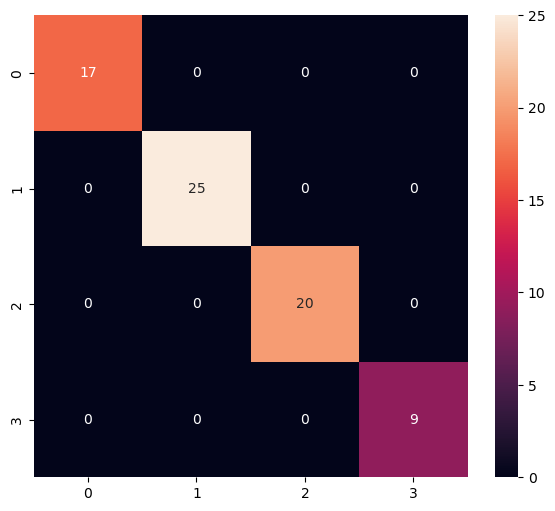

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         9

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\rituraj\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\rituraj\AppData\Local\Temp\tmp3agypktn\assets


INFO:tensorflow:Assets written to: C:\Users\rituraj\AppData\Local\Temp\tmp3agypktn\assets


6544

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 5.49 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9993360e-01 5.1199564e-05 3.5896366e-09 1.5136527e-05]
0
